continuous_probabilistic_methods.py or continuous_probabilistic_methods.ipynb 

1. Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.


Using lemonade.csv dataset and focusing on continuous variables:


Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?


Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?


Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?


Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?


Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:


Use a 2 sigma decision rule to isolate the outliers.


Do these make sense?


Should certain outliers be kept or removed?


Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv




In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [13]:
def get_lower_and_upper_bounds(series, multiplier):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_fence = q1 - (multiplier * iqr)
    upper_fence = q3 + (multiplier * iqr)
    return q1, q3, lower_fence, upper_fence 

In [3]:
url = "https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv"

In [4]:
df = pd.read_csv(url)

In [5]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [7]:
df.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.865753
std,18.085892,0.273890,13.786445,0.0,30.948132
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


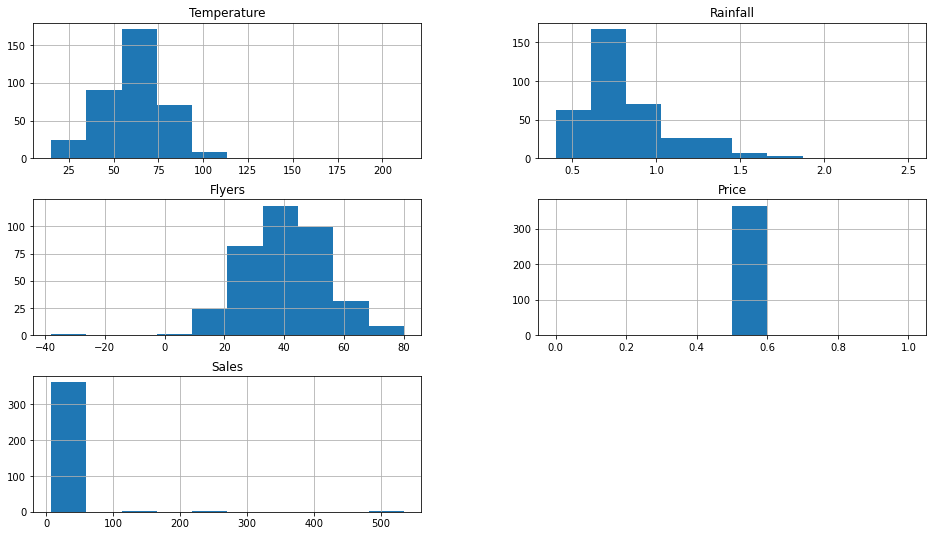

In [10]:
df.hist(figsize=[16,9])
plt.show()

In [14]:
get_lower_and_upper_bounds(df.Temperature, 1.5)

(49.7, 71.7, 16.700000000000003, 104.7)

In [15]:
get_lower_and_upper_bounds(df.Rainfall, 1.5)

(0.65, 0.91, 0.26, 1.3)

In [16]:
get_lower_and_upper_bounds(df.Flyers, 1.5)

(31.0, 49.0, 4.0, 76.0)

In [17]:
get_lower_and_upper_bounds(df.Price, 1.5)

(0.5, 0.5, 0.5, 0.5)

In [18]:
get_lower_and_upper_bounds(df.Sales, 1.5)

(20.0, 30.0, 5.0, 45.0)

In [19]:
get_lower_and_upper_bounds(df.Temperature, 3)

(49.7, 71.7, -16.299999999999997, 137.7)

In [20]:
get_lower_and_upper_bounds(df.Rainfall, 3)

(0.65, 0.91, -0.13, 1.69)

In [21]:
get_lower_and_upper_bounds(df.Flyers, 3)

(31.0, 49.0, -23.0, 103.0)

In [22]:
get_lower_and_upper_bounds(df.Price, 3)

(0.5, 0.5, 0.5, 0.5)

In [23]:
get_lower_and_upper_bounds(df.Sales, 3)

(20.0, 30.0, -10.0, 60.0)

In [27]:
x = df.Temperature

zscores = pd.Series((x - x.mean()) / x.std())

# Finds all of the observations two standard deviations or more.
x[zscores.abs() >= 2]

41     212.0
166     99.3
176    102.6
181    102.9
190     98.0
198     99.3
202     99.6
207     97.9
338     22.0
364     15.1
Name: Temperature, dtype: float64

In [28]:
# Finds all of the observations three standard deviations or more
x[zscores.abs() >= 3]

41    212.0
Name: Temperature, dtype: float64

In [30]:
x = df.Rainfall

zscores = pd.Series((x - x.mean()) / x.std())

# Finds all of the observations two standard deviations or more.
x[zscores.abs() >= 2]

0      2.00
5      1.54
6      1.54
10     1.54
15     1.67
16     1.43
19     1.43
23     1.54
337    1.54
338    1.82
342    1.43
343    1.82
346    1.43
347    1.54
351    1.43
355    1.54
359    1.43
363    1.43
364    2.50
Name: Rainfall, dtype: float64

In [31]:
# Finds all of the observations three standard deviations or more
x[zscores.abs() >= 3]

0      2.00
15     1.67
338    1.82
343    1.82
364    2.50
Name: Rainfall, dtype: float64

In [32]:
x = df.Flyers

zscores = pd.Series((x - x.mean()) / x.std())

# Finds all of the observations two standard deviations or more.
x[zscores.abs() >= 2]

166    77
170    70
171    76
182    68
183    68
194    80
198    76
203    72
204    69
207    74
324   -38
338    11
364     9
Name: Flyers, dtype: int64

In [33]:
# Finds all of the observations three standard deviations or more
x[zscores.abs() >= 3]

324   -38
Name: Flyers, dtype: int64